In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [2]:
data = pd.read_csv("C:\\Users\\ONEEKA\\Downloads\\penguins_synthetic_wide.csv")

In [3]:
data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Gentoo,Biscoe,51.211594,10.784101,198,6536,female
1,Chinstrap,Dream,49.578723,30.000000,190,3280,male
2,Gentoo,Biscoe,54.473814,16.435158,208,4077,female
3,Adelie,Biscoe,44.907998,25.894140,204,3665,female
4,Adelie,Dream,26.304201,13.736113,160,8000,male


In [4]:
data.shape

(1500, 7)

In [5]:
input = data[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g','sex','species','island']]
input.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,species,island
0,51.211594,10.784101,198,6536,female,Gentoo,Biscoe
1,49.578723,30.000000,190,3280,male,Chinstrap,Dream
2,54.473814,16.435158,208,4077,female,Gentoo,Biscoe
3,44.907998,25.894140,204,3665,female,Adelie,Biscoe
4,26.304201,13.736113,160,8000,male,Adelie,Dream


In [7]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

# Create new columns for encoded values
input['Species_n'] = LE.fit_transform(input['species'])
input['Island_n']  = LE.fit_transform(input['island'])


C:\Users\ONEEKA\AppData\Local\Temp\ipykernel_26688\573320861.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input['Species_n'] = LE.fit_transform(input['species'])
C:\Users\ONEEKA\AppData\Local\Temp\ipykernel_26688\573320861.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input['Island_n']  = LE.fit_transform(input['island'])


In [8]:
input['Sex_n'] = LE.fit_transform(input['sex'])

C:\Users\ONEEKA\AppData\Local\Temp\ipykernel_26688\2601231488.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input['Sex_n'] = LE.fit_transform(input['sex'])


In [9]:
input

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,species,island,Species_n,Island_n,Sex_n
0,51.211594,10.784101,198,6536,female,Gentoo,Biscoe,2,0,0
1,49.578723,30.000000,190,3280,male,Chinstrap,Dream,1,1,1
2,54.473814,16.435158,208,4077,female,Gentoo,Biscoe,2,0,0
3,44.907998,25.894140,204,3665,female,Adelie,Biscoe,0,0,0
4,26.304201,13.736113,160,8000,male,Adelie,Dream,0,1,1
...,...,...,...,...,...,...,...,...,...,...
1495,39.129537,15.963502,226,3325,female,Gentoo,Biscoe,2,0,0
1496,31.841796,21.379096,181,4030,female,Adelie,Biscoe,0,0,0
1497,41.027337,29.101908,213,4013,female,Adelie,Torgersen,0,2,0
1498,47.544529,16.402925,210,5488,female,Gentoo,Biscoe,2,0,0


In [10]:
input.drop(axis=1,columns='sex',inplace=True)
input.drop(axis=1,columns='species',inplace=True)
input.drop(axis=1,columns='island',inplace=True)

C:\Users\ONEEKA\AppData\Local\Temp\ipykernel_26688\3900912574.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input.drop(axis=1,columns='sex',inplace=True)
C:\Users\ONEEKA\AppData\Local\Temp\ipykernel_26688\3900912574.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input.drop(axis=1,columns='species',inplace=True)


In [11]:
input.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,Species_n,Island_n,Sex_n
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,44.855678,18.209765,201.434667,4210.080667,0.899333,0.635333,0.516667
std,9.242021,7.371352,22.064775,1290.829799,0.889416,0.721132,0.499889
min,25.000000,10.000000,160.000000,2000.000000,0.000000,0.000000,0.000000
25%,38.194683,14.948490,185.750000,3316.000000,0.000000,0.000000,0.000000
50%,44.742382,17.219552,200.000000,4107.000000,1.000000,0.000000,1.000000
75%,51.175820,19.545472,216.000000,5026.250000,2.000000,1.000000,1.000000
max,70.000000,91.000000,260.000000,8000.000000,2.000000,2.000000,1.000000


In [12]:
#input = input.dropna(axis = 0)
input = input.fillna(input.mean())

In [13]:
features = input[['bill_length_mm','bill_depth_mm','flipper_length_mm','Sex_n','Species_n','body_mass_g']]
features.shape

(1500, 6)

In [14]:
target=input[['Island_n']]
target.shape

(1500, 1)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size= 0.30, random_state= 12)

In [16]:
X_test.shape

(450, 6)

In [17]:
model = DecisionTreeClassifier(criterion='gini', max_depth=7)

In [18]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7)

In [19]:
model.score(X_train, y_train)

0.7666666666666667

In [20]:
model.score(X_test, y_test)

0.7155555555555555

In [21]:
model.feature_importances_

array([0.02236666, 0.01757246, 0.01973576, 0.        , 0.89309788,
       0.04722723])

In [22]:
model.predict([[65,1,1,26,2,3]])

D:\Anaconda_Navigator\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [23]:
model.predict([[30,1,0,52,1,2]])

D:\Anaconda_Navigator\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [24]:
X_test

,bill_length_mm,bill_depth_mm,flipper_length_mm,Sex_n,Species_n,body_mass_g
1160,65.471425,23.805803,224,0,1,2725
667,43.593727,20.830948,215,0,1,3733
949,49.836630,12.212865,204,0,2,6465
1243,47.069540,17.466808,166,0,0,2334
101,42.828036,11.954524,245,1,2,3599
...,...,...,...,...,...,...
884,35.031421,13.962568,191,1,0,3582
474,46.689788,12.077411,215,1,2,4887
67,49.501664,16.308667,200,1,0,4006
3,44.907998,25.894140,204,0,0,3665


In [25]:
y_test

,Island_n
1160,1
667,1
949,0
1243,2
101,0
...,...
884,2
474,0
67,1
3,0


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from itertools import combinations
import pandas as pd

# Assuming you already have your encoded dataset
# Features and target
features = ['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g','Sex_n','Species_n']
y = input['Island_n']   # encoded species column (target)

# Loop through all feature combinations
for r in range(1, len(features)+1):
    for subset in combinations(features, r):
        X = input[list(subset)]
        
        # Split data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        
        # Build Decision Tree classifier
        model = DecisionTreeClassifier(random_state=42)
        model.fit(X_train, y_train)
        
        # Print test accuracy
        print(subset, "->", model.score(X_test, y_test))


('bill_length_mm',) -> 0.36333333333333334
('bill_depth_mm',) -> 0.47
('flipper_length_mm',) -> 0.5466666666666666
('body_mass_g',) -> 0.4866666666666667
('Sex_n',) -> 0.51
('Species_n',) -> 0.69
('bill_length_mm', 'bill_depth_mm') -> 0.46
('bill_length_mm', 'flipper_length_mm') -> 0.51
('bill_length_mm', 'body_mass_g') -> 0.5
('bill_length_mm', 'Sex_n') -> 0.4
('bill_length_mm', 'Species_n') -> 0.6733333333333333
('bill_depth_mm', 'flipper_length_mm') -> 0.4866666666666667
('bill_depth_mm', 'body_mass_g') -> 0.51
('bill_depth_mm', 'Sex_n') -> 0.44
('bill_depth_mm', 'Species_n') -> 0.6966666666666667
('flipper_length_mm', 'body_mass_g') -> 0.5066666666666667
('flipper_length_mm', 'Sex_n') -> 0.51
('flipper_length_mm', 'Species_n') -> 0.6933333333333334
('body_mass_g', 'Sex_n') -> 0.4766666666666667
('body_mass_g', 'Species_n') -> 0.6766666666666666
('Sex_n', 'Species_n') -> 0.69
('bill_length_mm', 'bill_depth_mm', 'flipper_length_mm') -> 0.54
('bill_length_mm', 'bill_depth_mm', 'body_m

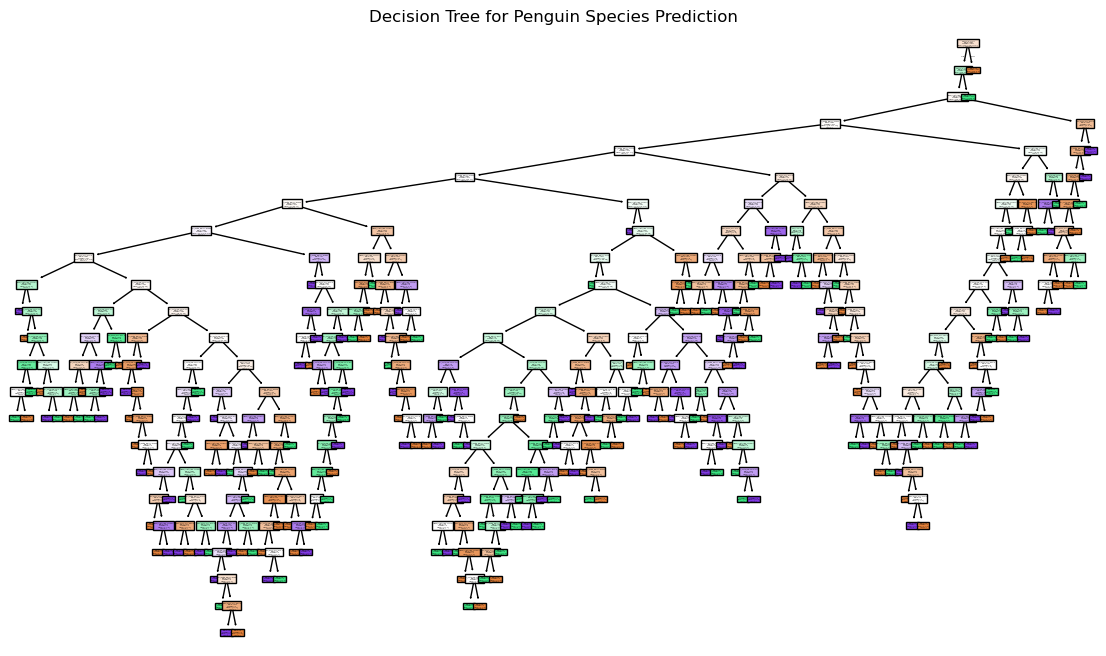

In [27]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Step 1: Load the data
# Step 2: Select features and target
features = input[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g','Sex_n','Species_n']]

# Replace 'Target' with the actual target column name in your CSV (e.g., 'Kidney_Disease')
target = input['Island_n'] 

# Step 3: Split the dataset (optional but recommended)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Train decision tree
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Plot the tree
plt.figure(figsize=(14, 8))
plot_tree(
    clf, 
    feature_names=features.columns.tolist(),  # <-- convert to list
    class_names=[str(cls) for cls in clf.classes_],
    filled=True
)

plt.title("Decision Tree for Penguin Species Prediction")
plt.show()

